In [47]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D', 'nsdsyn')
fig_dir = '/Volumes/server/Projects/sfp_nsd/derivatives/figures'
lr = 0.0005
max_epoch = 30000
dset='nsdsyn'
roi_list = ['V1','V2','V3']
vsc='pRFsize'
subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
args = ['lr','eph','sub','roi','dset']
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(i, 'broderick') for i in broderick_sn_list]

# 1D model

In [3]:
stim_list=['annulus', 'forward spiral', 'pinwheel', 'reverse spiral']
lr=0.005
max_epoch=8000
e1=0.5
e2=4
enum=7
dset='nsdsyn'
curbin_list = np.arange(0, enum)

In [4]:
results_dir = os.path.join(output_dir, 'sfp_model', 'results_1D', 'nsdsyn')
args = ['sub', 'class','dset', 'lr', 'eph', 'roi', 'e1', 'e2', 'nbin', 'curbin']
pt_file_list = []
for subj, roi, stim, curbin in itertools.product(subj_list, roi_list, stim_list, curbin_list):
    stim_class = stim.replace(' ', '-')
    file_name = os.path.join(results_dir, f'model-params_class-{stim_class}_lr-{lr}_eph-{max_epoch}_e1-{e1}_e2-{e2}_nbin-{enum}_curbin-{curbin}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(os.path.join(results_dir, file_name))
tuning_df = tuning.load_all_models(pt_file_list, args)


In [5]:
results_dir = os.path.join(output_dir, 'sfp_model', 'results_1D', 'nsdsyn')
args = ['sub', 'dset', 'roi']
pt_file_list = []
for subj, roi in itertools.product(subj_list, roi_list):
    stim_class = stim.replace(' ', '-')
    file_name = os.path.join(output_dir, 'dataframes', 'nsdsyn', 'binned', f'binned_e1-{e1}_e2-{e2}_nbin-{enum}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.csv')
    pt_file_list.append(os.path.join(results_dir, file_name))
subj_df = tuning.load_history_files(pt_file_list, *args)

In [6]:
tmp_df = subj_df.query('sub == "subj01" & names == "annulus"')
tmp_tuning_df = tuning_df.query('sub == "subj01" & names == "annulus"')

In [97]:
tmp_tuning_df

,slope,mode,sigma,sub,names,dset,lr_rate,max_epoch,vroinames,e1,e2,nbin,curbin,ecc_bin
0,2.818848,6.337374,2.494156,subj01,annulus,nsdsyn,0.005,8000,V1,0.5,4,7,0,0.5-1.0 deg
0,3.378958,4.023179,2.324562,subj01,annulus,nsdsyn,0.005,8000,V1,0.5,4,7,1,1.0-1.5 deg
0,2.924453,2.745814,2.211805,subj01,annulus,nsdsyn,0.005,8000,V1,0.5,4,7,2,1.5-2.0 deg
0,3.091418,2.300579,2.104126,subj01,annulus,nsdsyn,0.005,8000,V1,0.5,4,7,3,2.0-2.5 deg
0,3.621661,2.000403,2.045646,subj01,annulus,nsdsyn,0.005,8000,V1,0.5,4,7,4,2.5-3.0 deg
0,4.120688,1.872905,2.002959,subj01,annulus,nsdsyn,0.005,8000,V1,0.5,4,7,5,3.0-3.5 deg
0,3.322271,1.947863,2.040027,subj01,annulus,nsdsyn,0.005,8000,V1,0.5,4,7,6,3.5-4.0 deg
0,2.145953,13.235638,3.301686,subj01,annulus,nsdsyn,0.005,8000,V2,0.5,4,7,0,0.5-1.0 deg
0,2.376200,8.934454,4.240182,subj01,annulus,nsdsyn,0.005,8000,V2,0.5,4,7,1,1.0-1.5 deg
0,2.226011,5.688778,3.709788,subj01,annulus,nsdsyn,0.005,8000,V2,0.5,4,7,2,1.5-2.0 deg


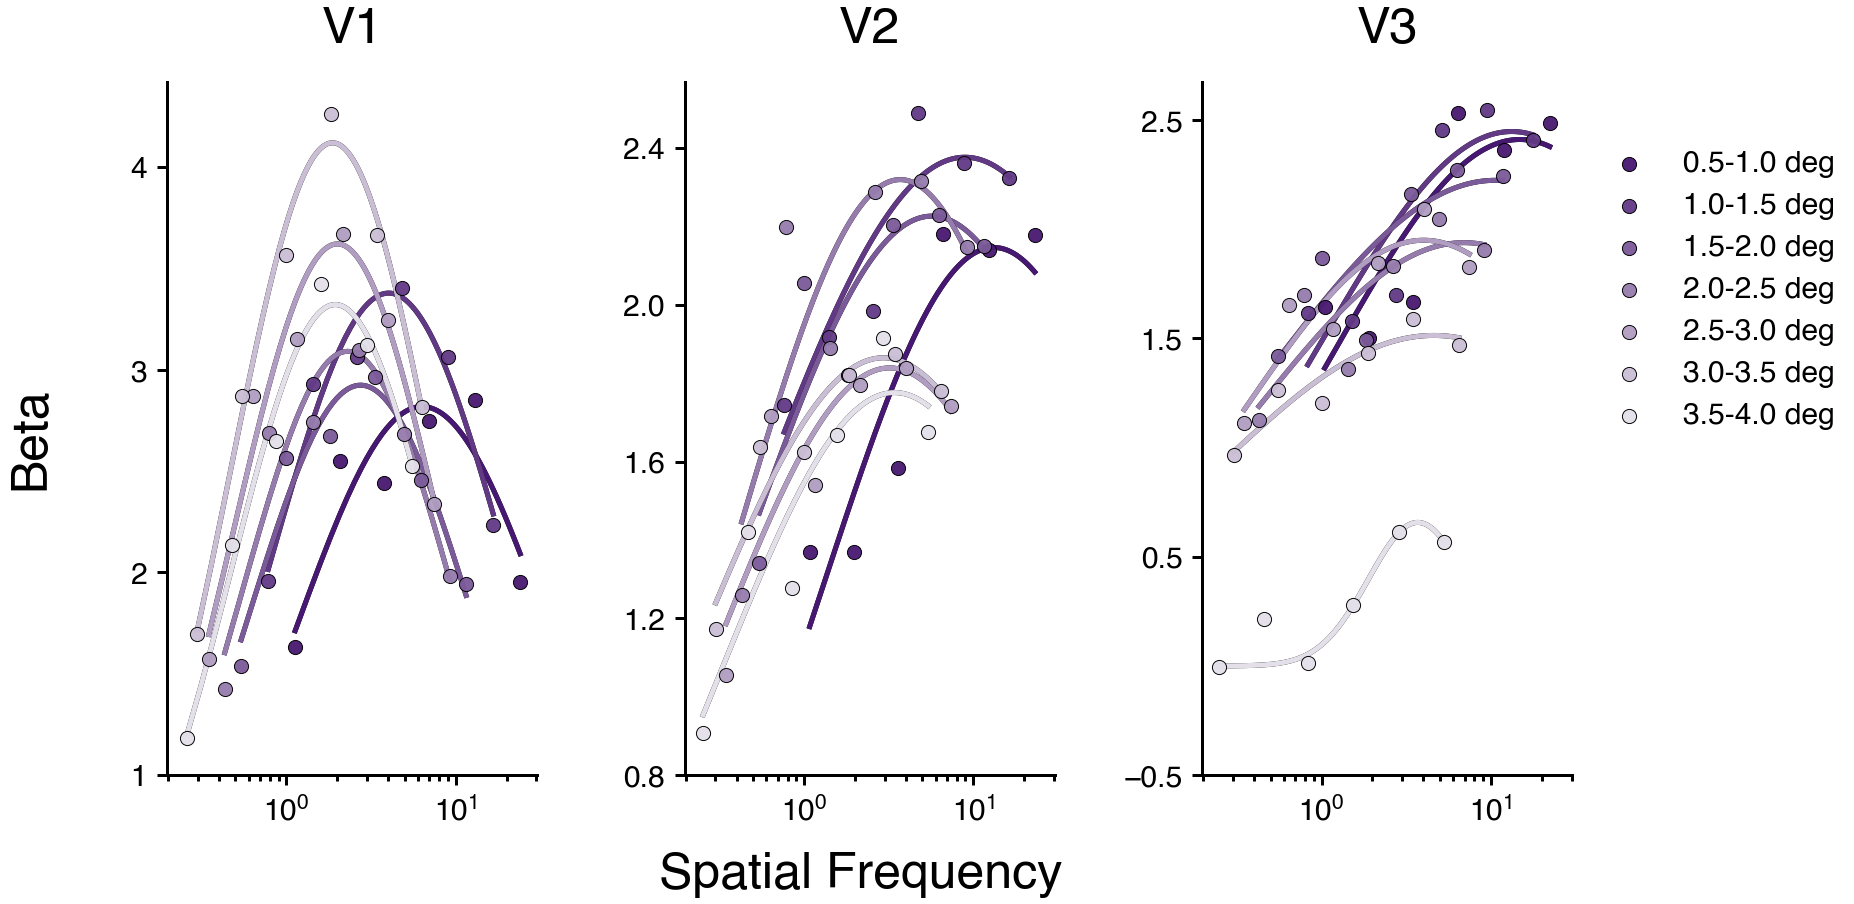

In [110]:
vis1D.plot_sf_curves(df=tmp_df, x='local_sf', y='betas', hue='ecc_bin',
                     col='vroinames', params_df=tmp_tuning_df, lgd_title=None,
                     save_path=None)

In [104]:
a = pd.read_csv(os.path.join(output_dir, 'dataframes', 'nsdsyn', 'binned', 'binned_e1-0.5_e2-4_nbin-7_dset-nsdsyn_sub-subj02_roi-V1_vs-pRFsize.csv'))
a.groupby(['sub','ecc_bin','vroinames','freq_lvl'], group_keys=False).mean().reset_index()

,sub,ecc_bin,vroinames,freq_lvl,betas,local_sf
0,subj02,0.5-1.0 deg,V1,0,2.381451,1.163672
1,subj02,0.5-1.0 deg,V1,1,3.574706,2.086340
2,subj02,0.5-1.0 deg,V1,2,4.110677,3.973026
3,subj02,0.5-1.0 deg,V1,3,3.858530,7.364216
4,subj02,0.5-1.0 deg,V1,4,3.810905,13.805764
5,subj02,0.5-1.0 deg,V1,5,2.260200,25.625015
6,subj02,1.0-1.5 deg,V1,0,2.134833,0.767544
7,subj02,1.0-1.5 deg,V1,1,3.238433,1.376125
8,subj02,1.0-1.5 deg,V1,2,3.655297,2.620561
9,subj02,1.0-1.5 deg,V1,3,3.353186,4.857349


# Broderick dataset

In [56]:
broderick_file_list = []

bd_file_list = []
for subj in broderick_subj_list:
    f = os.path.join('/Volumes/server/Projects/sfp_nsd/derivatives_old/sfp_model/results_2D', f'model_history_dset-broderick_bts-median_full_ver-True_sub-{subj}_lr-0.0005_eph-30000_V1.h5')
    bd_file_list.append(f)
bd_args = ['dset','sub']
bd_df = utils.load_history_files(bd_file_list, *bd_args)
bd_df['vroinames'] = 'V1'
final_bd_df = bd_df.query('epoch == 29999')


In [57]:
final_bd_df

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,sub,vroinames
29999,29999,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004069,0.031463,-0.007001,broderick,wlsubj001,V1
29999,29999,2.207649,0.192008,0.318536,0.072753,-0.027144,0.036718,-0.007561,0.047686,0.008027,broderick,wlsubj006,V1
29999,29999,1.859566,0.123812,0.328673,0.060503,-0.059433,0.160803,-0.005691,0.033455,0.018466,broderick,wlsubj007,V1
29999,29999,1.839831,0.137402,0.193707,0.066500,-0.050486,0.016282,-0.014123,0.080934,-0.027548,broderick,wlsubj045,V1
29999,29999,2.236669,0.101690,0.221754,0.039310,-0.023616,0.083696,0.022005,0.039015,-0.012657,broderick,wlsubj046,V1
29999,29999,2.115541,0.132440,0.323145,-0.033379,-0.018277,-0.122890,0.097172,0.064806,-0.021059,broderick,wlsubj062,V1
29999,29999,2.130340,0.136759,0.284252,0.091025,-0.036157,0.023343,0.001187,0.025593,0.001959,broderick,wlsubj064,V1
29999,29999,2.249078,0.079767,0.374599,0.044345,-0.077721,0.177016,0.003899,0.037286,0.005977,broderick,wlsubj081,V1
29999,29999,2.300413,0.121761,0.466371,0.125765,-0.021344,0.136857,-0.083407,-0.019852,0.014446,broderick,wlsubj095,V1
29999,29999,2.089035,0.128973,0.312971,0.111180,-0.003874,0.062324,-0.035700,0.094206,-0.024604,broderick,wlsubj114,V1


In [88]:
broderick_file_list = []

bd_file_list = []
for subj in broderick_subj_list:
    f = os.path.join('/Volumes/server/Projects/sfp_nsd/derivatives_old/sfp_model/results_2D', f'model_history_dset-broderick_bts-median_full_ver-True_sub-{subj}_lr-0.0005_eph-30000_V1.h5')
    bd_file_list.append(f)
bd_args = ['dset','sub']
bd_df = utils.load_history_files(bd_file_list, *bd_args)
bd_df['vroinames'] = 'V1'
final_bd_df = bd_df.query('epoch == 29999')

bd_file_list = []
for bd_subj in broderick_subj_list:
    f = os.path.join(output_dir, 'dataframes', 'broderick', 'precision', f'precision-v_dset-broderick_sub-{bd_subj}_roi-V1_vs-pRFsize.csv')
    bd_file_list.append(f)
bd_precision = utils.load_history_files(bd_file_list)
bd_precision_s = bd_precision.groupby(['sub','vroinames'], group_keys=False).mean().reset_index()

final_bd_df = final_bd_df.merge(bd_precision_s[['sub','vroinames','sigma_v_squared']], on=['sub','vroinames'])
final_bd_df.head()

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,sub,vroinames,sigma_v_squared
0,29999,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004069,0.031463,-0.007001,broderick,wlsubj001,V1,0.096439
1,29999,2.207649,0.192008,0.318536,0.072753,-0.027144,0.036718,-0.007561,0.047686,0.008027,broderick,wlsubj006,V1,0.091271
2,29999,1.859566,0.123812,0.328673,0.060503,-0.059433,0.160803,-0.005691,0.033455,0.018466,broderick,wlsubj007,V1,0.263597
3,29999,1.839831,0.137402,0.193707,0.066500,-0.050486,0.016282,-0.014123,0.080934,-0.027548,broderick,wlsubj045,V1,0.186538
4,29999,2.236669,0.101690,0.221754,0.039310,-0.023616,0.083696,0.022005,0.039015,-0.012657,broderick,wlsubj046,V1,0.187891


# NSD dataset

In [42]:
stim_info='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsyn_stim_description.csv'
stim_info = vis2D.get_w_a_and_w_r_for_each_stim_class(stim_info)
stim_info

,names,w_r,w_a
0,pinwheel,0.0,6.0
24,forward spiral,4.0,4.0
48,annulus,6.0,0.0
72,reverse spiral,4.0,-4.0


In [43]:
pt_file_list = []
for subj, roi in itertools.product(subj_list, ['V1','V2','V3']):
    file_name = os.path.join(results_dir, f'model-params_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(os.path.join(results_dir, file_name))
final_params = model.load_all_models(pt_file_list, *args)
final_params

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,lr_rate,max_epoch,sub,vroinames,dset
0,2.490021,0.139594,0.217478,0.022201,-0.021813,-0.274858,-0.012191,0.023888,-0.006918,0.0005,30000,subj01,V1,nsdsyn
0,5.543962,0.230673,0.313956,0.027977,-0.002200,-1.300301,0.388318,-0.001618,-0.003984,0.0005,30000,subj01,V2,nsdsyn
0,4.952771,0.175571,0.289297,-0.024290,-0.021548,-1.176202,0.330713,0.042333,-0.006572,0.0005,30000,subj01,V3,nsdsyn
0,2.009928,0.124187,0.090198,0.101903,-0.053708,-0.001964,-0.054230,0.006940,0.006901,0.0005,30000,subj02,V1,nsdsyn
0,3.414492,0.312690,0.004236,-0.175029,-0.189858,-0.184870,0.009310,-0.012834,-0.059446,0.0005,30000,subj02,V2,nsdsyn
0,3.735031,0.215806,0.003350,-0.155246,-0.029568,-0.162825,0.061312,-0.002249,-0.018574,0.0005,30000,subj02,V3,nsdsyn
0,2.529316,0.054894,0.109951,0.045723,0.009979,0.132809,-0.127411,0.005100,-0.009297,0.0005,30000,subj03,V1,nsdsyn
0,3.113770,0.124130,0.022593,-0.034448,-0.089924,0.009114,-0.118260,0.019569,0.009351,0.0005,30000,subj03,V2,nsdsyn
0,3.751331,0.111387,0.002604,-0.044083,0.013960,-0.080169,-0.109286,0.026123,0.004000,0.0005,30000,subj03,V3,nsdsyn
0,1.979350,0.182145,0.122061,0.046359,-0.014748,0.117450,-0.143140,0.036360,-0.017871,0.0005,30000,subj04,V1,nsdsyn


In [46]:
vis2D.calculate_preferred_period_for_synthetic_df(stim_info, final_params,
                                            (0,10), 3,
                                                (0,2*np.pi), 3,
                                                ecc_col='eccentricity', angle_col='angle',
                                                angle_in_radians=True,
                                                reference_frame='absolute')


,names,w_r,w_a,eccentricity,angle,local_ori,Pv
0,vertical,0.0,6.0,0.0,0.000000,1.570796,0.265030
1,left oblique,4.0,4.0,0.0,0.000000,0.785398,0.224873
2,horizontal,6.0,0.0,0.0,0.000000,0.000000,0.155135
3,right oblique,4.0,-4.0,0.0,0.000000,2.356194,0.224873
4,vertical,0.0,6.0,5.0,0.000000,1.570796,1.115616
5,left oblique,4.0,4.0,5.0,0.000000,0.785398,0.946579
6,horizontal,6.0,0.0,5.0,0.000000,0.000000,0.653025
7,right oblique,4.0,-4.0,5.0,0.000000,2.356194,0.946579
8,vertical,0.0,6.0,10.0,0.000000,1.570796,1.966202
9,left oblique,4.0,4.0,10.0,0.000000,0.785398,1.668286


In [48]:
ecc1=0
ecc2=4
n_ecc=4
ang1=0
ang2=360
n_ang=360

pt_file_list = []
for subj, roi, frame in itertools.product(subj_list, ['V1','V2','V3'], ['absolute','relative']):
    file_name = os.path.join(output_dir, 'sfp_model', "prediction_2D", f"{dset}",f'prediction_frame-{frame}_eccentricity-{ecc1}-{ecc2}-{n_ecc}_angle-{ang1}-{ang2}-{n_ang}_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.h5')
    pt_file_list.append(file_name)
nsd_df = tuning.load_history_files(pt_file_list, *['frame','lr','eph','sub','roi','dset'])

In [49]:
file_list = []
for subj, roi in itertools.product(subj_list, ['V1','V2','V3']):
    f = os.path.join(output_dir, 'dataframes', dset, 'precision', f'precision-v_dset-{dset}_sub-{subj}_roi-{roi}_vs-pRFsize.csv')
    file_list.append(f)
precision_v = utils.load_history_files(file_list)
precision_s = precision_v.groupby(['sub','vroinames']).mean().reset_index()
nsd_df = nsd_df.merge(precision_s, on=['sub','vroinames'])

In [50]:
nsd_df

,names,w_r,w_a,eccentricity,angle,local_ori,Pv,frame,lr_rate,max_epoch,sub,vroinames,dset,voxel,noise_SD,sigma_v_squared
0,vertical,0.0,6.0,0.000000,0.000000,1.570796,0.265030,absolute,0.0005,30000,subj01,V1,nsdsyn,3592.364385,0.733836,0.745111
1,left oblique,4.0,4.0,0.000000,0.000000,0.785398,0.224873,absolute,0.0005,30000,subj01,V1,nsdsyn,3592.364385,0.733836,0.745111
2,horizontal,6.0,0.0,0.000000,0.000000,0.000000,0.155135,absolute,0.0005,30000,subj01,V1,nsdsyn,3592.364385,0.733836,0.745111
3,right oblique,4.0,-4.0,0.000000,0.000000,2.356194,0.224873,absolute,0.0005,30000,subj01,V1,nsdsyn,3592.364385,0.733836,0.745111
4,vertical,0.0,6.0,1.333333,0.000000,1.570796,0.491853,absolute,0.0005,30000,subj01,V1,nsdsyn,3592.364385,0.733836,0.745111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276475,reverse spiral,4.0,-4.0,2.666667,6.283185,2.356194,0.560110,relative,0.0005,30000,subj08,V3,nsdsyn,2358.904011,0.920245,1.163426
276476,pinwheel,0.0,6.0,4.000000,6.283185,1.570796,0.894084,relative,0.0005,30000,subj08,V3,nsdsyn,2358.904011,0.920245,1.163426
276477,forward spiral,4.0,4.0,4.000000,6.283185,0.785398,0.761670,relative,0.0005,30000,subj08,V3,nsdsyn,2358.904011,0.920245,1.163426
276478,annulus,6.0,0.0,4.000000,6.283185,0.000000,0.215193,relative,0.0005,30000,subj08,V3,nsdsyn,2358.904011,0.920245,1.163426


In [74]:
pt_file_list = []
for subj, roi, frame in itertools.product(broderick_subj_list, ['V1'], ['absolute','relative']):
    file_name = os.path.join(output_dir, 'sfp_model', "prediction_2D", f"broderick",f'prediction_frame-{frame}_eccentricity-0-10-3_angle-{ang1}-{ang2}-{n_ang}_lr-0.0005_eph-30000_dset-broderick_sub-{subj}_roi-{roi}_vs-{vsc}.h5')
    pt_file_list.append(file_name)
bd_df = tuning.load_history_files(pt_file_list, *['frame','lr','eph','sub','roi','dset'])
bd_df

,names,w_r,w_a,eccentricity,angle,local_ori,Pv,frame,lr_rate,max_epoch,sub,vroinames,dset
0,vertical,0.0,6.0,0.0,0.000000,1.570796,0.386208,absolute,0.0005,30000,wlsubj001,V1,broderick
1,left oblique,4.0,4.0,0.0,0.000000,0.785398,0.407821,absolute,0.0005,30000,wlsubj001,V1,broderick
2,horizontal,6.0,0.0,0.0,0.000000,0.000000,0.398246,absolute,0.0005,30000,wlsubj001,V1,broderick
3,right oblique,4.0,-4.0,0.0,0.000000,2.356194,0.407821,absolute,0.0005,30000,wlsubj001,V1,broderick
4,vertical,0.0,6.0,5.0,0.000000,1.570796,0.729079,absolute,0.0005,30000,wlsubj001,V1,broderick
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,reverse spiral,4.0,-4.0,5.0,6.283185,2.356194,0.860909,relative,0.0005,30000,wlsubj121,V1,broderick
4316,pinwheel,0.0,6.0,10.0,6.283185,1.570796,0.484653,relative,0.0005,30000,wlsubj121,V1,broderick
4317,forward spiral,4.0,4.0,10.0,6.283185,0.785398,0.799262,relative,0.0005,30000,wlsubj121,V1,broderick
4318,annulus,6.0,0.0,10.0,6.283185,0.000000,1.040130,relative,0.0005,30000,wlsubj121,V1,broderick


In [75]:
bd_file_list = []
for bd_subj in broderick_subj_list:
    f = os.path.join(output_dir, 'dataframes', 'broderick', 'precision', f'precision-v_dset-broderick_sub-{bd_subj}_roi-V1_vs-pRFsize.csv')
    bd_file_list.append(f)
bd_precision = utils.load_history_files(bd_file_list)
bd_precision_s = bd_precision.groupby(['sub','vroinames'], group_keys=False).mean().reset_index()

bd_df = bd_df.merge(bd_precision_s[['sub','vroinames','sigma_v_squared']], on=['sub','vroinames'])
bd_df['vroinames'] = 'V1 Broderick'


In [73]:
bd_df.query('eccentricity == 0 & 0.09 >angle > 0.08')

,names,w_r,w_a,eccentricity,angle,local_ori,Pv,frame,lr_rate,max_epoch,sub,vroinames,dset,sigma_v_squared
60,vertical,0.0,6.0,0.0,0.08751,1.570796,0.386140,absolute,0.0005,30000,wlsubj001,V1,broderick,0.096439
61,left oblique,4.0,4.0,0.0,0.08751,0.785398,0.408274,absolute,0.0005,30000,wlsubj001,V1,broderick,0.096439
62,horizontal,6.0,0.0,0.0,0.08751,0.000000,0.398116,absolute,0.0005,30000,wlsubj001,V1,broderick,0.096439
63,right oblique,4.0,-4.0,0.0,0.08751,2.356194,0.407565,absolute,0.0005,30000,wlsubj001,V1,broderick,0.096439
4380,pinwheel,0.0,6.0,0.0,0.08751,1.658306,0.386840,relative,0.0005,30000,wlsubj001,V1,broderick,0.096439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95103,right oblique,4.0,-4.0,0.0,0.08751,2.356194,0.900313,absolute,0.0005,30000,wlsubj121,V1,broderick,0.179514
99420,pinwheel,0.0,6.0,0.0,0.08751,1.658306,0.562251,relative,0.0005,30000,wlsubj121,V1,broderick,0.179514
99421,forward spiral,4.0,4.0,0.0,0.08751,0.872908,0.887685,relative,0.0005,30000,wlsubj121,V1,broderick,0.179514
99422,annulus,6.0,0.0,0.0,0.08751,0.087510,1.197254,relative,0.0005,30000,wlsubj121,V1,broderick,0.179514


In [76]:
final_df = nsd_df.append(bd_df)
final_df['precision'] = 1/final_df['sigma_v_squared']

In [77]:
ecc_df = final_df.groupby(['sub','vroinames','names','eccentricity','dset','frame']).mean().reset_index()

In [63]:
ecc_df

,sub,vroinames,names,eccentricity,dset,frame,w_r,w_a,angle,local_ori,Pv,voxel,noise_SD,sigma_v_squared,precision
0,subj01,V1,annulus,0.000000,nsdsyn,relative,6.0,0.0,3.141593,1.562070,0.155051,3592.364385,0.733836,0.745111,1.342082
1,subj01,V1,annulus,1.333333,nsdsyn,relative,6.0,0.0,3.141593,1.562070,0.287750,3592.364385,0.733836,0.745111,1.342082
2,subj01,V1,annulus,2.666667,nsdsyn,relative,6.0,0.0,3.141593,1.562070,0.420449,3592.364385,0.733836,0.745111,1.342082
3,subj01,V1,annulus,4.000000,nsdsyn,relative,6.0,0.0,3.141593,1.562070,0.553147,3592.364385,0.733836,0.745111,1.342082
4,subj01,V1,forward spiral,0.000000,nsdsyn,relative,4.0,4.0,3.141593,1.570796,0.220142,3592.364385,0.733836,0.745111,1.342082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,wlsubj121,V1,pinwheel,5.000000,broderick,relative,0.0,6.0,3.141593,1.570796,0.705945,NaN,NaN,0.179514,5.570611
908,wlsubj121,V1,pinwheel,10.000000,broderick,relative,0.0,6.0,3.141593,1.570796,0.655395,NaN,NaN,0.179514,5.570611
909,wlsubj121,V1,reverse spiral,0.000000,broderick,relative,4.0,-4.0,3.141593,1.570796,0.926576,NaN,NaN,0.179514,5.570611
910,wlsubj121,V1,reverse spiral,5.000000,broderick,relative,4.0,-4.0,3.141593,1.570796,0.864661,NaN,NaN,0.179514,5.570611


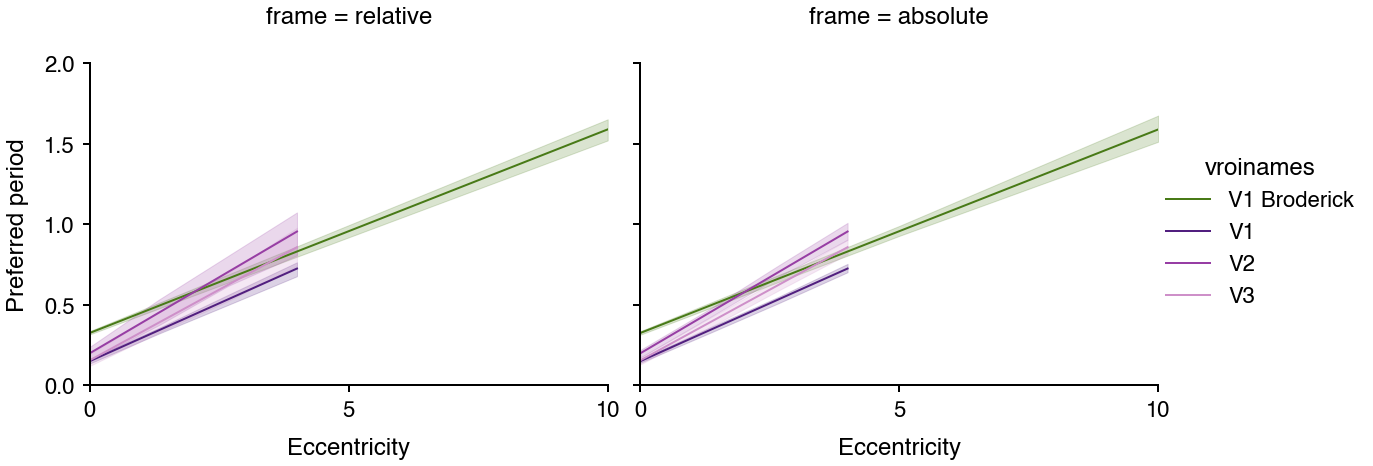

In [84]:
vis2D.plot_preferred_period(ecc_df.query('sub != "wlsubj121"'),
                            x='eccentricity', hue='vroinames',                                   hue_order=['V1 Broderick', 'V1','V2','V3'],
                            col='frame',
                            lgd_title='vroinames',
                            xlim=(0,4),
                            save_path='/Users/jh7685/Desktop/123_all_without_outlier.png')

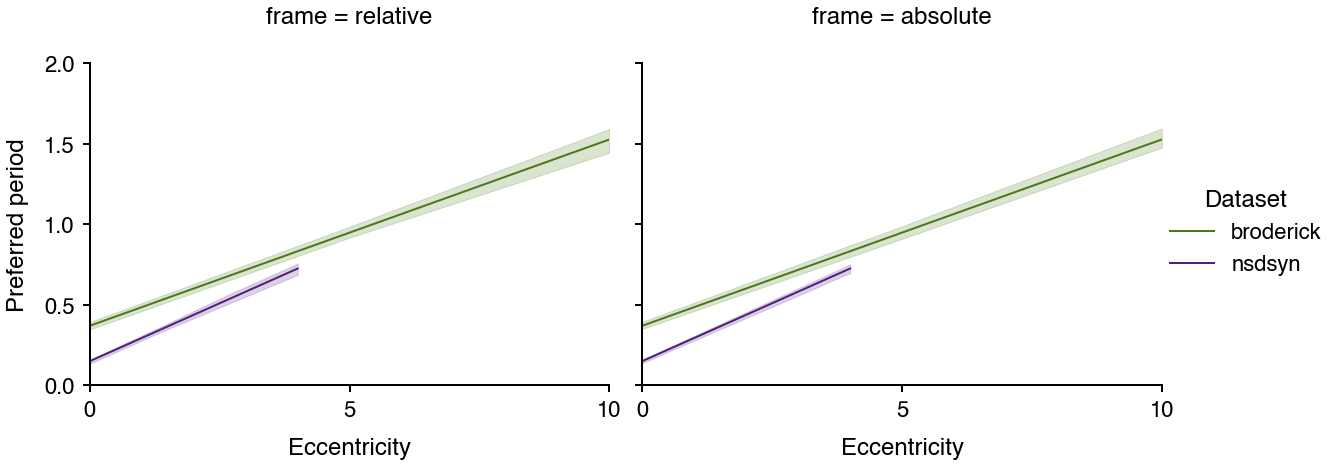

In [70]:
vis2D.plot_preferred_period(ecc_df.query('vroinames == "V1"'),
                            x='eccentricity', hue='dset',                                   hue_order=['broderick','nsdsyn'],
                            col='frame',
                            lgd_title='Dataset',
                            xlim=(0,4),
                            save_path=None)

In [ ]:
# ['vertical', 'reverse diagonal', 'horizontal', 'forward diagonal']

In [ ]:
vis2D.plot_preferred_period(ecc_df, x='eccentricity', hue='dset',
                            hue_order=['broderick','nsdsyn'],
                            lgd_title='Dataset',
                            xlim=(0,10))

In [47]:
angle_df = nsd_df.query('eccentricity == 10')
angle_df = angle_df.groupby(['sub','names','angle']).mean().reset_index()

/Users/jh7685/opt/miniconda3/envs/sfp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
angle_df

,sub,names,angle,w_r,w_a,eccentricity,local_ori,Pv,voxel,noise_SD,sigma_v_squared,precision,value_and_weights


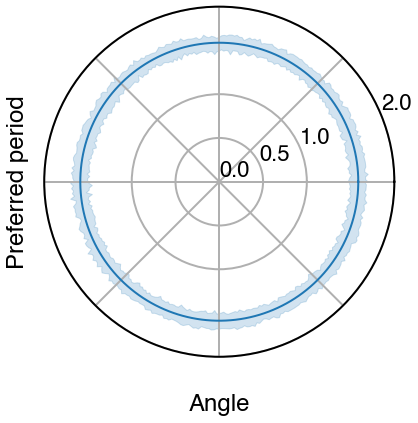

In [53]:
vis2D.plot_preferred_period(angle_df, x='angle', projection='polar',
                            xlim=(0, 2*np.pi))

In [91]:
broderick_stim_info = vis2D.get_w_a_and_w_r_for_each_stim_class('/Volumes/server/Projects/sfp_nsd/Broderick_dataset/broderick_stim_description.csv')

In [102]:
broderick_stim_info['absolute_frame'] = prep.calculate_local_orientation(broderick_stim_info['w_a'],
                                 broderick_stim_info['w_r'],
                                 retinotopic_angle=None,
                                 reference_frame='absolute')
broderick_stim_info

,names,w_r,w_a,absolute_frame
0,pinwheel,0.0,6.0,1.570796
80,annulus,6.0,0.0,0.000000
160,forward spiral,4.0,4.0,0.785398
240,reverse spiral,4.0,-4.0,2.356194


In [96]:
{'forward spiral': 'left oblique',
 'reverse spiral': 'right oblique',
'annulus': 'horizontal',
'pinwheel': 'vertical'}

array([0.        , 0.78539816, 1.57079633, 2.35619449])

In [71]:
vis2D.make_synthetic_dataframe_for_2D(broderick_stim_info,
                                      ecc_range=(0,10),n_ecc= 3,
                                      angle_range=(0, 2*np.pi), n_angle=360,
                                      angle_in_radians=True)

,w_r,w_a,phase,image_idx,class_idx,names,freq_lvl,eccentricity,angle,local_ori
0,0.0,6.0,0.000000,0,0,pinwheel,0,0.0,0.000000,1.570796
1,0.0,6.0,0.785398,1,0,pinwheel,0,0.0,0.000000,1.570796
2,0.0,6.0,1.570796,2,0,pinwheel,0,0.0,0.000000,1.570796
3,0.0,6.0,2.356194,3,0,pinwheel,0,0.0,0.000000,1.570796
4,0.0,6.0,3.141593,4,0,pinwheel,0,0.0,0.000000,1.570796
...,...,...,...,...,...,...,...,...,...,...
414715,8.0,-31.0,2.356194,379,47,mixtures,5,10.0,6.283185,1.823351
414716,8.0,-31.0,3.141593,380,47,mixtures,5,10.0,6.283185,1.823351
414717,8.0,-31.0,3.926991,381,47,mixtures,5,10.0,6.283185,1.823351
414718,8.0,-31.0,4.712389,382,47,mixtures,5,10.0,6.283185,1.823351


In [85]:
pt_file_list = []
for subj, roi in itertools.product(subj_list, ['V1','V2','V3']):
    file_name = os.path.join(results_dir, f'model-params_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(os.path.join(results_dir, file_name))
df = model.load_all_models(pt_file_list, *args)


In [86]:
file_list = []
for subj, roi in itertools.product(subj_list, ['V1','V2','V3']):
    f = os.path.join(output_dir, 'dataframes', dset, 'precision', f'precision-v_dset-{dset}_sub-{subj}_roi-{roi}_vs-pRFsize.csv')
    file_list.append(f)
precision_v = utils.load_history_files(file_list)
precision_s = precision_v.groupby(['sub','vroinames']).mean().reset_index()


In [87]:

final_nsd_df = df.merge(precision_s, on=['sub','vroinames'])
final_nsd_df

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,lr_rate,max_epoch,sub,vroinames,dset,voxel,noise_SD,sigma_v_squared
0,2.490021,0.139594,0.217478,0.022201,-0.021813,-0.274858,-0.012191,0.023888,-0.006918,0.0005,30000,subj01,V1,nsdsyn,3592.364385,0.733836,0.745111
1,5.543962,0.230673,0.313956,0.027977,-0.002200,-1.300301,0.388318,-0.001618,-0.003984,0.0005,30000,subj01,V2,nsdsyn,3442.611677,0.618268,0.645804
2,4.952771,0.175571,0.289297,-0.024290,-0.021548,-1.176202,0.330713,0.042333,-0.006572,0.0005,30000,subj01,V3,nsdsyn,2770.051599,0.547299,0.385100
3,2.009928,0.124187,0.090198,0.101903,-0.053708,-0.001964,-0.054230,0.006940,0.006901,0.0005,30000,subj02,V1,nsdsyn,3799.338401,0.945643,1.318375
4,3.414492,0.312690,0.004236,-0.175029,-0.189858,-0.184870,0.009310,-0.012834,-0.059446,0.0005,30000,subj02,V2,nsdsyn,2976.106116,0.813358,1.133998
5,3.735031,0.215806,0.003350,-0.155246,-0.029568,-0.162825,0.061312,-0.002249,-0.018574,0.0005,30000,subj02,V3,nsdsyn,2708.056796,0.704553,0.731810
6,2.529316,0.054894,0.109951,0.045723,0.009979,0.132809,-0.127411,0.005100,-0.009297,0.0005,30000,subj03,V1,nsdsyn,3912.447499,1.236065,2.212868
7,3.113770,0.124130,0.022593,-0.034448,-0.089924,0.009114,-0.118260,0.019569,0.009351,0.0005,30000,subj03,V2,nsdsyn,3359.008589,0.949707,1.335929
8,3.751331,0.111387,0.002604,-0.044083,0.013960,-0.080169,-0.109286,0.026123,0.004000,0.0005,30000,subj03,V3,nsdsyn,2549.252347,0.698254,0.656864
9,1.979350,0.182145,0.122061,0.046359,-0.014748,0.117450,-0.143140,0.036360,-0.017871,0.0005,30000,subj04,V1,nsdsyn,2411.088080,0.822985,0.898926


In [89]:
final_df = final_bd_df.append(final_nsd_df)
final_df['precision'] = 1 / final_df['sigma_v_squared']
params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]

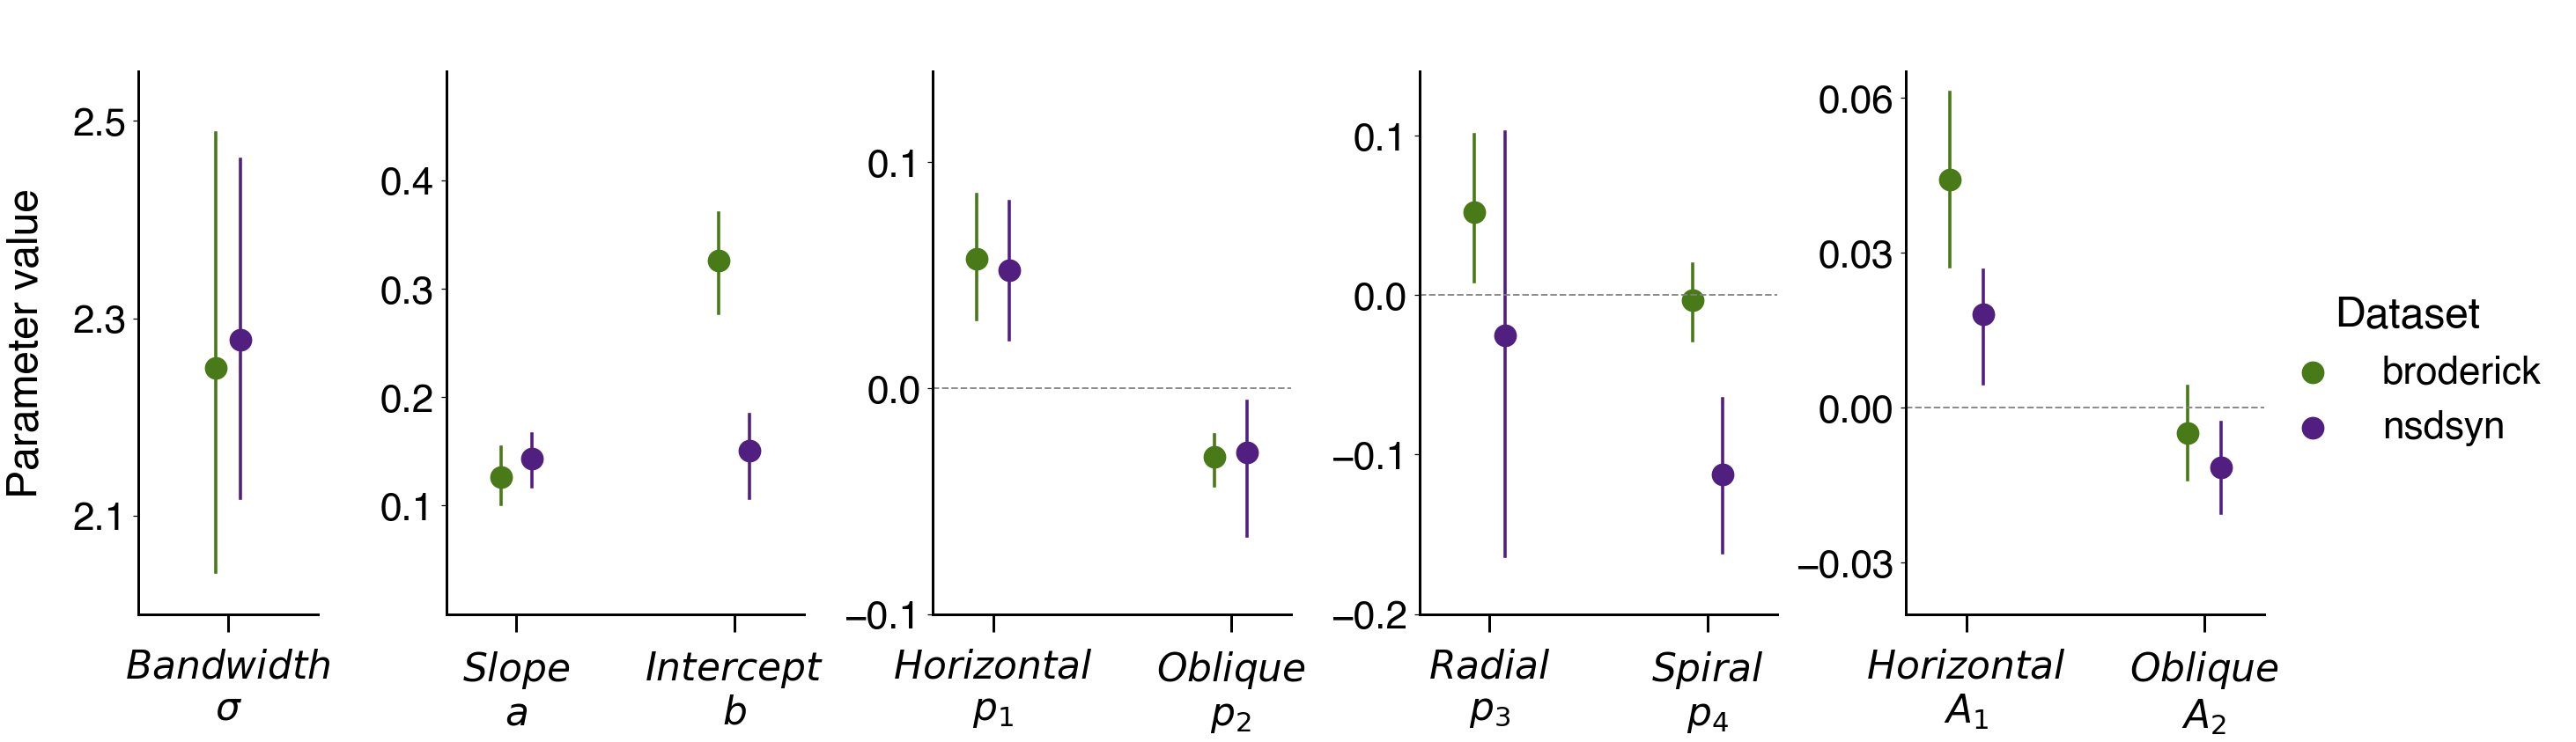

In [92]:

ylim_list = [(2, 2.55), (0, 0.5), (-0.1, 0.14), (-0.2, 0.14), (-0.04, 0.065)]
yticks_list = [[2.1,2.3,2.5], [0.1,0.2,0.3,0.4], [-0.1,0,0.1], [-0.2,-0.1,0,0.1], [-0.03,0,0.03,0.06]]
fig_name = f'fig-params_lr-{lr}_eph-{max_epoch}_dset-all_sub-all_roi-V1_vs-{vsc}.svg'
grid = vis2D.plot_precision_weighted_avg_parameters(final_df.query('vroinames == "V1" & sub != "wlsubj121"'),
                                                    params_list,
                                                    group,
                                                    hue='dset',
                                                    hue_order=['broderick', 'nsdsyn'],
                                                    lgd_title='Dataset',
                                                    height=14,
                                                    pal=utils.get_colors('dset', to_plot=['broderick', 'nsdsyn']),
                                                    ylim_list=ylim_list,
                                                    ytick_list=yticks_list,
                                                    save_path='/Users/jh7685/Desktop/without_outlier.png')

In [98]:
def dset_roi(row):
    if row.dset == "broderick":
        new_col = 'V1 Broderick'
    else:
        new_col = row.vroinames
    return new_col

In [99]:
final_df['dset_roi'] = final_df.apply(dset_roi, axis=1)

In [100]:
broderick_color = utils.get_dset_colors(['broderick'])
roi_colors = utils.get_colors('roi', ['V1','V2','V3'])
all_colors = broderick_color + roi_colors

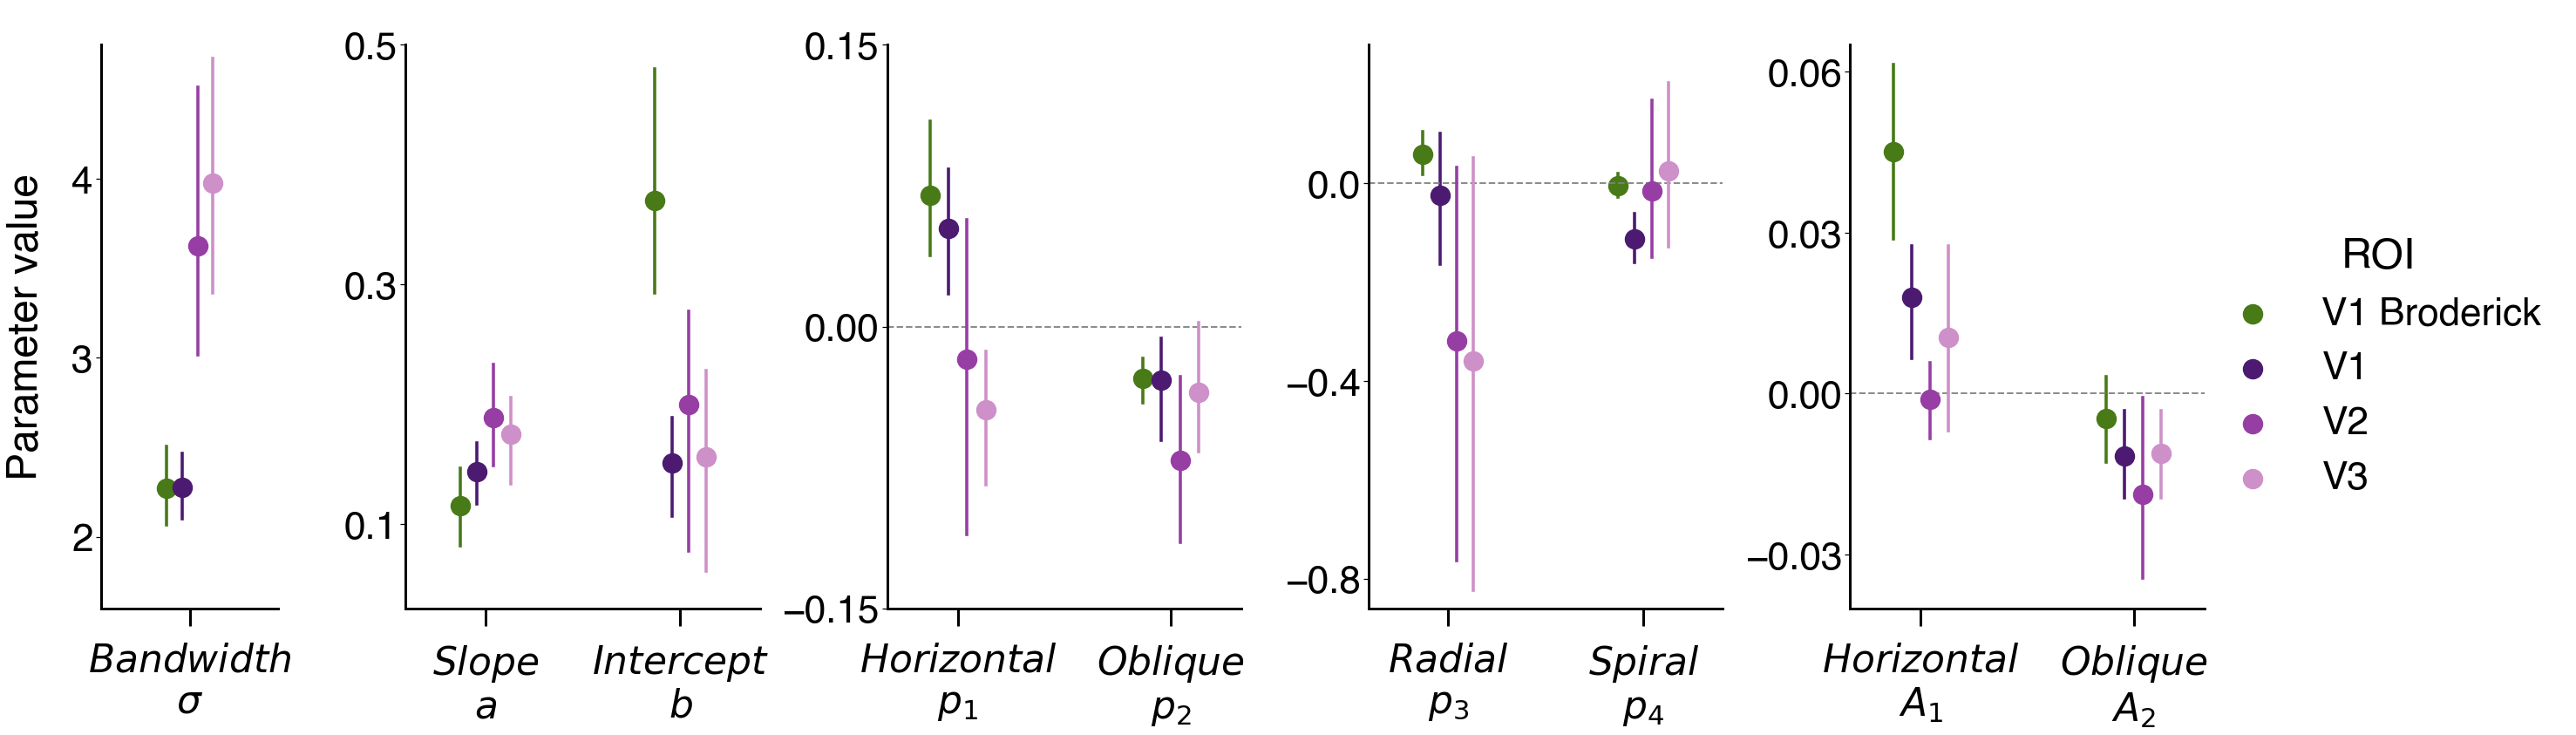

In [116]:
params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]
fig_name_2 = f'fig-params_lr-{lr}_eph-{max_epoch}_dset-all_sub-all_roi-V1V2V3_vs-{vsc}.svg'
ylim_list = [(1.6, 4.75), (0.03, 0.5), (-0.15, 0.15),(-0.86, 0.28), (-0.04, 0.065)]
yticks_list = [[2, 3, 4], [0.1, 0.3, 0.5], [-0.15,0,0.15], [-0.8, -0.4,0], [-0.03,0,0.03,0.06]]
grid = vis2D.plot_precision_weighted_avg_parameters(final_df,
                                                    params_list,
                                                    group,
                                                    hue='dset_roi',
                                                    hue_order=['V1 Broderick','V1','V2','V3'],
                                                    lgd_title='ROI',
                                                    height=14,
                                                    pal=all_colors,
                                                    dodge=0.26,
                                                    dot_scale=2,
                                                    ylim_list=ylim_list,
                                                    ytick_list=yticks_list,
                                                    save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'dset_comparison', fig_name_2))

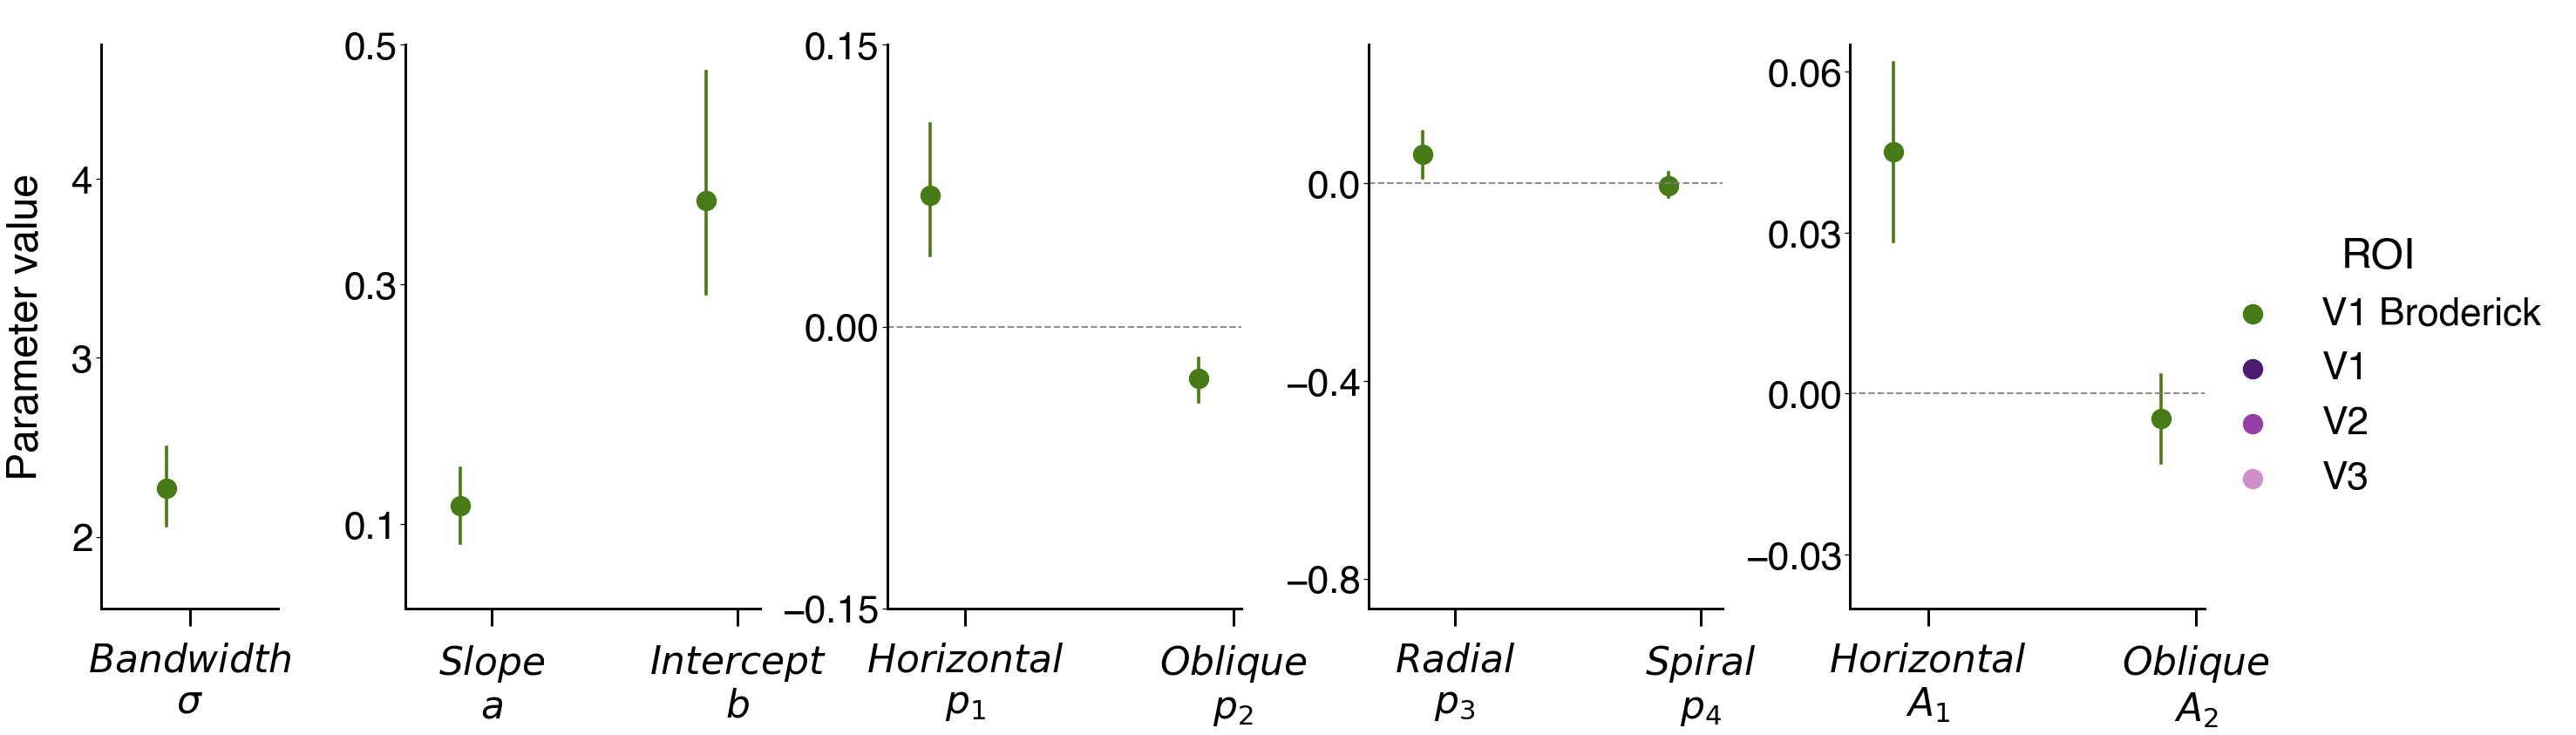

In [120]:
fig_name_t = f'fig-params_lr-{lr}_eph-{max_epoch}_dset-all_sub-all_roi-V1b_vs-{vsc}.svg'
ylim_list = [(1.6, 4.75), (0.03, 0.5), (-0.15, 0.15),(-0.86, 0.28), (-0.04, 0.065)]
yticks_list = [[2, 3, 4], [0.1, 0.3, 0.5], [-0.15,0,0.15], [-0.8, -0.4,0], [-0.03,0,0.03,0.06]]
grid = vis2D.plot_precision_weighted_avg_parameters(final_df.query('dset_roi == "V1 Broderick"'),
                                                    params_list,
                                                    group,
                                                    hue='dset_roi',
                                                    hue_order=['V1 Broderick','V1','V2','V3'],
                                                    lgd_title='ROI',
                                                    height=14,
                                                    pal=all_colors,
                                                    dodge=0.26,
                                                    dot_scale=2,
                                                    ylim_list=ylim_list,
                                                    ytick_list=yticks_list,
                                                    save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'dset_comparison', fig_name_t))

In [464]:
sigma_df = final_nsd_df.pivot('sub','vroinames','sigma').reset_index()
sigma_df

vroinames,sub,V1,V2,V3
0,subj01,2.490021,5.543962,4.952771
1,subj02,2.009928,3.414492,3.735031
2,subj03,2.529316,3.113770,3.751331
3,subj04,1.979350,3.412445,3.451084
4,subj05,2.611645,3.272760,6.245852
5,subj06,2.102069,2.838126,3.093458
6,subj07,2.290964,3.148344,3.458214
7,subj08,2.554011,3.293100,3.454509


In [475]:
scatter_df = vis2D.make_multiple_xy_with_vars(final_nsd_df,
                                 'sub',
                                 'vroinames',
                                 ['sigma', 'slope', 'intercept'],
                                 val_name='params')

In [485]:
scatter_df

,sub,x,y,vroinames,params
0,subj01,2.490021,5.543962,V1-V2,sigma
1,subj02,2.009928,3.414492,V1-V2,sigma
2,subj03,2.529316,3.113770,V1-V2,sigma
3,subj04,1.979350,3.412445,V1-V2,sigma
4,subj05,2.611645,3.272760,V1-V2,sigma
5,subj06,2.102069,2.838126,V1-V2,sigma
6,subj07,2.290964,3.148344,V1-V2,sigma
7,subj08,2.554011,3.293100,V1-V2,sigma
0,subj01,5.543962,4.952771,V2-V3,sigma
1,subj02,3.414492,3.735031,V2-V3,sigma


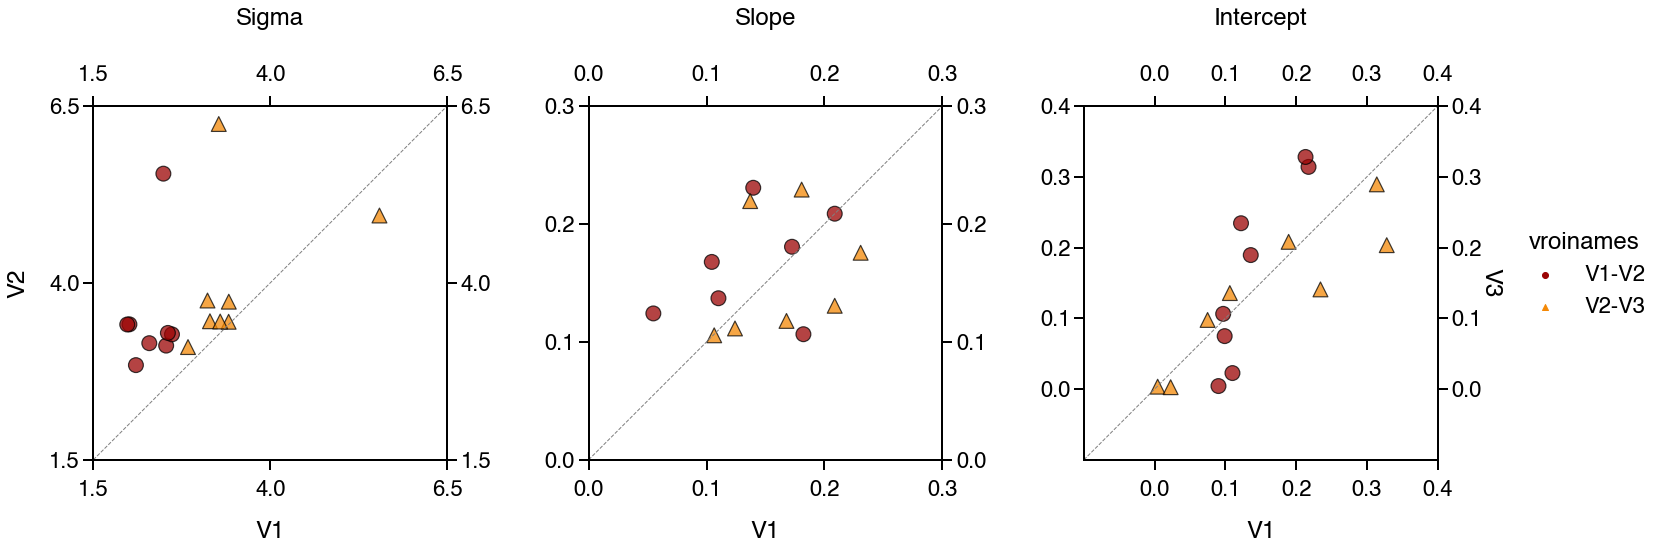

In [590]:
scatter_kwargs={'palette': utils.convert_rgb_to_seaborn_color_palette([(155, 4, 4), (244, 137, 7)],2),
                'edgecolor':'k',
                'linewidth':1.2,
                'markers': {'V1-V2': 'o', 'V2-V3': '^'},
                's': 220,
                'alpha':0.75}
fig_name_3 = f'fig-params-visual-hierarchy_lr-{lr}_eph-{max_epoch}_dset-nsdsyn_sub-all_roi-V1V2V3_vs-{vsc}.svg'
grid = vis2D.plot_vareas(scatter_df,
                         'x',
                         'y',
                         col='params',
                         hue='vroinames',
                         style='vroinames',
                         new_ticks_list=[[1.5, 4, 6.5],
                                         [0, 0.1, 0.2, 0.3],
                                         [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4]],
                         height=7,
                         save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'nsdsyn', fig_name_3),
                         **scatter_kwargs)

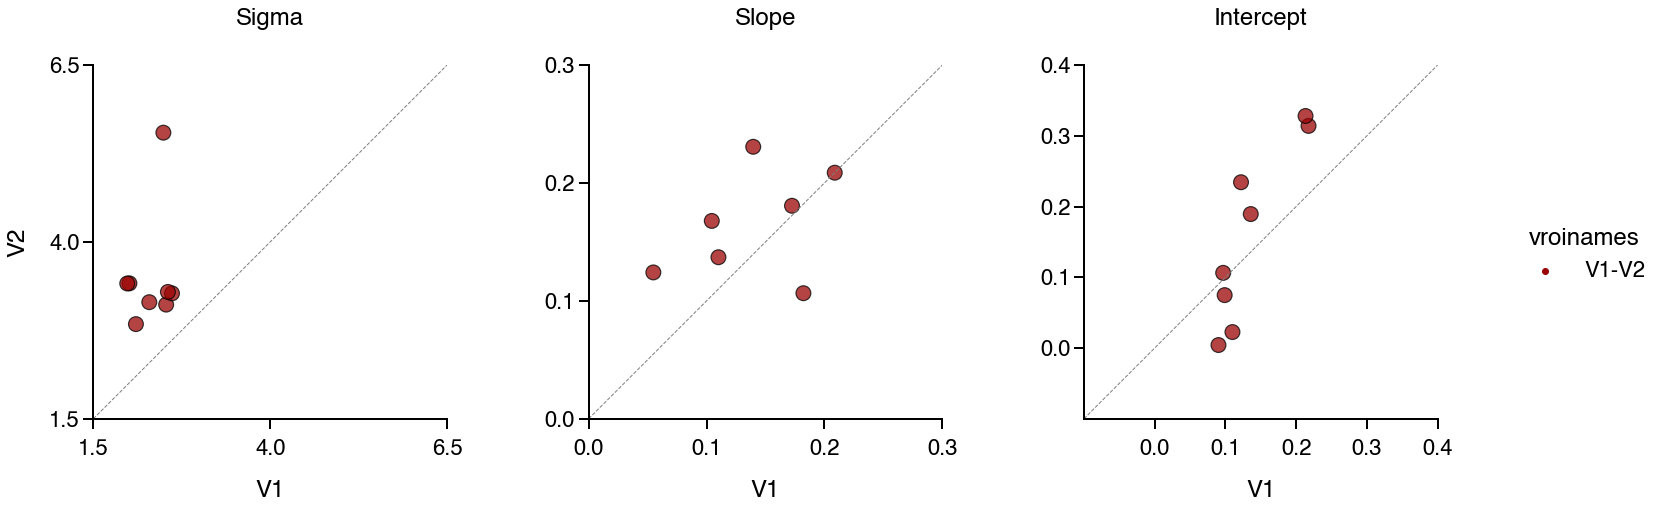

In [592]:
scatter_kwargs={'palette': utils.convert_rgb_to_seaborn_color_palette([(155, 4, 4)],1),
                'edgecolor':'k',
                'linewidth':1.2,
                'markers': {'V1-V2': 'o', 'V2-V3': '^'},
                's': 220,
                'alpha':0.75}
fig_name_4 = f'fig-params-visual-hierarchy-2_lr-{lr}_eph-{max_epoch}_dset-nsdsyn_sub-all_roi-V1V2V3_vs-{vsc}.svg'
grid = vis2D.plot_varea(scatter_df.query('vroinames == "V1-V2"'),
                         'x',
                         'y',
                         col='params',
                         hue='vroinames',
                         style='vroinames',
                         new_ticks_list=[[1.5, 4, 6.5],
                                         [0, 0.1, 0.2, 0.3],
                                         [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4]],
                         height=7,
                         save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'nsdsyn', fig_name_4),
                         **scatter_kwargs)

array([        inf,  1.        ,  0.        , -1.        ,  2.42857143,
        0.41176471, -0.41176471, -2.42857143])

In [134]:
stim_description_path = '/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv'
stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv')
stim_info = stim_info[~stim_info['names'].str.contains("intermediate")]
stim_info = stim_info.drop_duplicates('names')
stim_info = stim_info[['names','w_r','w_a']]
stim_info

,names,w_r,w_a
0,pinwheel,0.0,6.0
24,forward spiral,4.0,4.0
48,annulus,6.0,0.0
72,reverse spiral,4.0,-4.0


In [144]:
syn_df = vis2D.make_synthetic_dataframe_for_2D(stim_description_path,
                                               (0,5), 3,
                                               (0,np.pi*2), 2,
                                               ecc_col='eccentricity',
                                               angle_col='angle',
                                               angle_in_radians=True)
syn_df

,names,w_r,w_a,eccentricity,angle,local_ori
0,pinwheel,0.0,6.0,0.0,0.000000,1.570796
1,forward spiral,4.0,4.0,0.0,0.000000,0.785398
2,annulus,6.0,0.0,0.0,0.000000,0.000000
3,reverse spiral,4.0,-4.0,0.0,0.000000,2.356194
4,pinwheel,0.0,6.0,2.5,0.000000,1.570796
5,forward spiral,4.0,4.0,2.5,0.000000,0.785398
6,annulus,6.0,0.0,2.5,0.000000,0.000000
7,reverse spiral,4.0,-4.0,2.5,0.000000,2.356194
8,pinwheel,0.0,6.0,5.0,0.000000,1.570796
9,forward spiral,4.0,4.0,5.0,0.000000,0.785398


In [168]:
example_params = final_nsd_df.query('vroinames == "V1"')

In [169]:
sub_df = vis2D.calculate_preferred_period_for_all_subjects(subj_list=subj_list,
                                                  synthetic_df=syn_df,
                                                  final_params=example_params)

In [170]:
sub_df

,names,w_r,w_a,eccentricity,angle,local_ori,sub,Pv
0,pinwheel,0.0,6.0,0.0,0.000000,1.570796,subj01,0.265030
1,forward spiral,4.0,4.0,0.0,0.000000,0.785398,subj01,0.224873
2,annulus,6.0,0.0,0.0,0.000000,0.000000,subj01,0.155135
3,reverse spiral,4.0,-4.0,0.0,0.000000,2.356194,subj01,0.224873
4,pinwheel,0.0,6.0,2.5,0.000000,1.570796,subj01,0.690323
...,...,...,...,...,...,...,...,...
187,reverse spiral,4.0,-4.0,2.5,6.283185,2.356194,subj08,0.720907
188,pinwheel,0.0,6.0,5.0,6.283185,1.570796,subj08,1.252823
189,forward spiral,4.0,4.0,5.0,6.283185,0.785398,subj08,1.328962
190,annulus,6.0,0.0,5.0,6.283185,0.000000,subj08,0.650862


In [171]:
sub_df['precision'] = 1

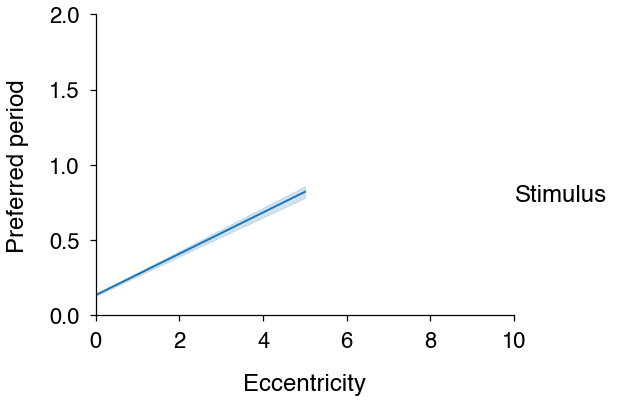

In [172]:
vis2D.plot_preferred_period(sub_df, projection=None,
                            x='eccentricity',
                            save_path=None)